# Tutorial Step 5: GWOSC API Examples

This tutorial will present [`GWpy`](https://gwpy.github.io/), a python package that provides a user-friendly, intuitive interface to the common time-domain and frequency-domain data.
It also allows programmatic access to the data on the [GWOSC web site](https://gwosc.org/).
Here, we will only focus on reading data from the GWOSC.
More information can be found in the [package documentation](https://gwpy.github.io/docs/).

## Installation

The best way to install `GWpy` depends on your environment.
Please read [the installation instructions](https://gwpy.github.io/docs/stable/install/).

In [1]:
# If you use IGWN conda distribution or if you use this notebook through My Binder, the `gwpy` package should already be installed.
# Uncomment the following line if running in Google Colab or in you own virtualenv.
#! pip install -q 'gwpy==3.0.8'

In [2]:
import gwpy
print(gwpy.__version__)

/Users/mdubois/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


3.0.8


## Downloading and plotting data

`GWpy` can be used to download a chunk of data around a GPS time.
Let's start by downloading the same file than in the previous tutorials.
In `GWpy`, this is done through the [`TimeSeries`](https://gwpy.github.io/docs/stable/timeseries/) class and the [`fetch_open_data`](https://gwpy.github.io/docs/stable/timeseries/opendata/#timeseries-fetch-open-data) class-method.

In [3]:
from gwpy.timeseries import TimeSeries

start = 1264312320
end   = start + 4095

data = TimeSeries.fetch_open_data('H1', start, end)

The `TimeSeries` object can be plotted directly:

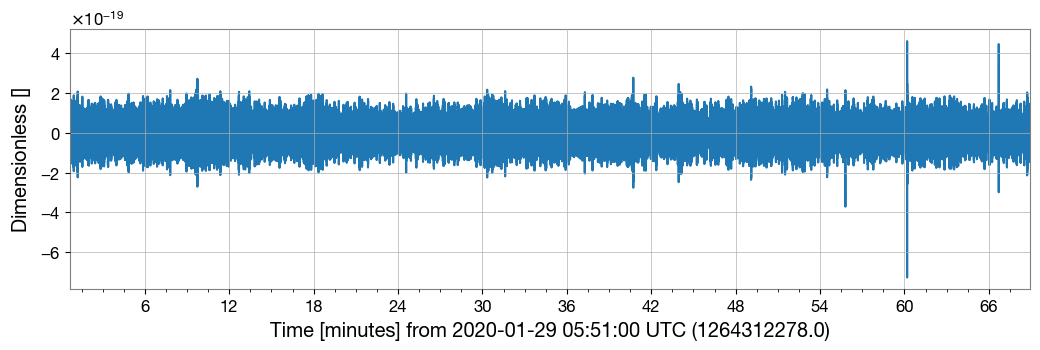

In [4]:
figure = data.plot()

As you can see, a `TimeSeries` object combines the value of the (dimensionless) strain and the acquisition time.

In [5]:
print(data)

TimeSeries([-9.97334403e-21, -1.48231254e-20, -2.54824746e-22,
            ...,  3.61069398e-20,  3.88395431e-20,
             4.52274538e-20]
           unit: dimensionless,
           t0: 1264312320.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


This method offers more flexibility compared to downloading files and then read the data in it since you can download exactly the data you want without having to juggle between files.
For instance, let's download the data 

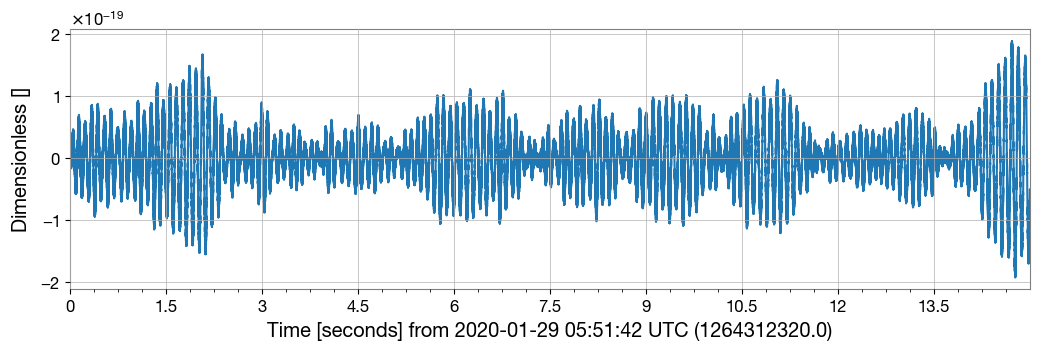

In [6]:
data_15s = TimeSeries.fetch_open_data('H1', start, start + 15)
figure_data_15s = data_15s.plot()

Also, you can download data around a particular event.

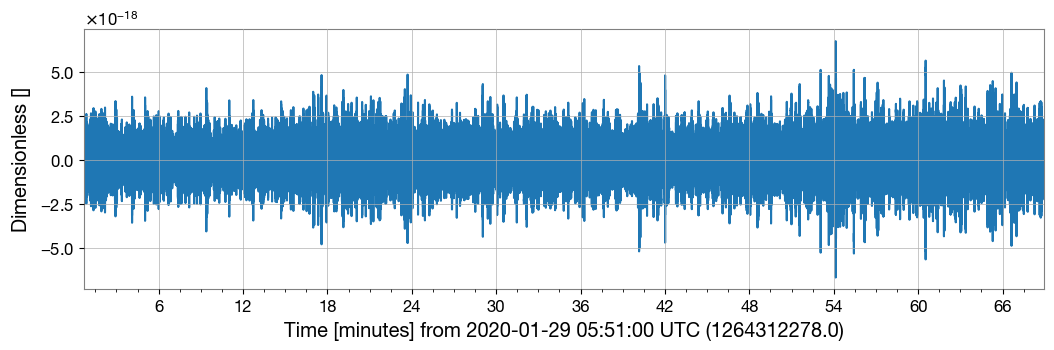

In [7]:
from gwosc.datasets import event_gps

event_gps   = event_gps("GW150914")
event_start = int(event_gps) - 15
event_end   = int(event_gps) + 15

event_data = TimeSeries.fetch_open_data('L1', start, end)
event_figure = event_data.plot()

The [`gwosc`](https://gwosc.readthedocs.io/en/stable/) package is a low-level interface to the GWOSC website that is used by `GWpy` for some operations.

### Manipulating TimeSeries

`TimeSeries` can be sliced using time, not just indices.

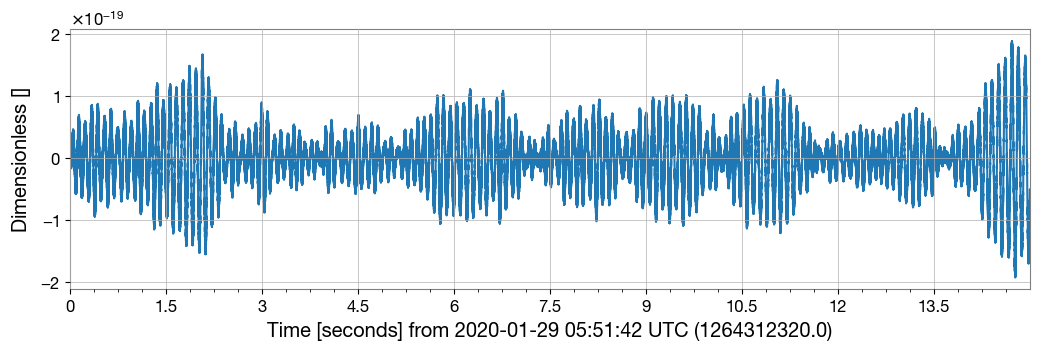

In [8]:
cropped_data = data.crop(start, start + 15)
cropped_figure = cropped_data.plot()

As you can see, the time axis is correctly sliced too.

`TimeSeries` objects also has advanced statistical and signal-processing methods.
Read more [here](https://gwpy.github.io/docs/stable/examples/timeseries/).

## Download data quality and segments

Access to data quality is done through the [`StateVector`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.StateVector/#gwpy.timeseries.StateVector) class.
Let's download the data quality flags associated to our data.

In [9]:
from gwpy.timeseries import StateVector

state = StateVector.fetch_open_data("H1", start, end)
print(state)

StateVector([127, 127, 127, ..., 127, 127, 127]
            unit: dimensionless,
            t0: 1264312320.0 s,
            dt: 1.0 s,
            name: Data quality,
            channel: None,
            bits: Bits(0: data present
                        1: passes the cbc CAT1 test
                        2: passes cbc CAT2 test
                        3: passes cbc CAT3 test
                        4: passes burst CAT1 test
                        5: passes burst CAT2 test
                        6: passes burst CAT3 test,
                        channel=None,
                        epoch=1264312320.0))


You will recognize the bit mask representation that we have seen in [step 3](<03 - Working with Data Quality.ipynb>).
Note that the names of the channels are taken from their description.

Let's plot that.

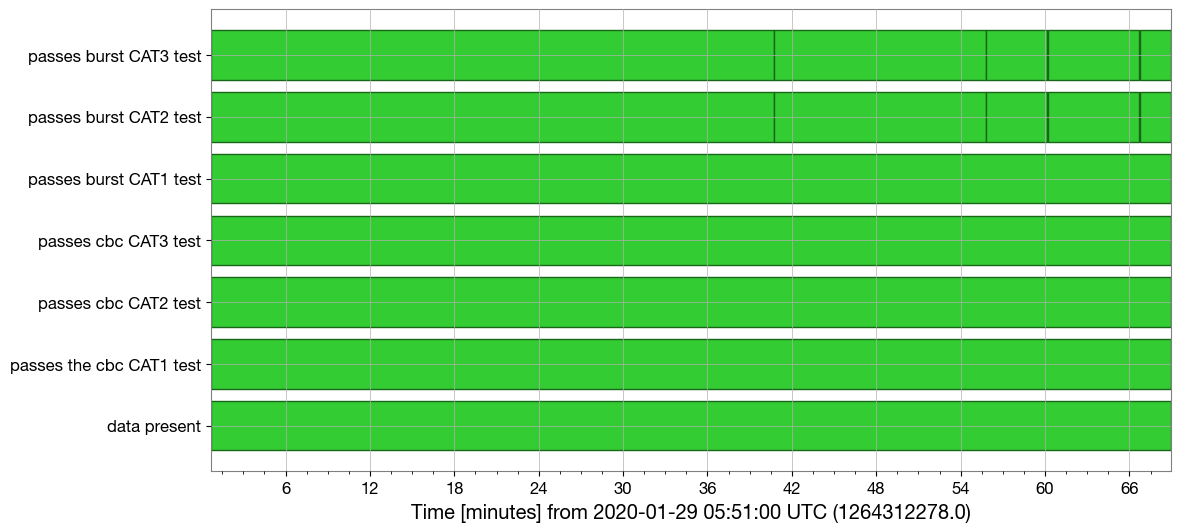

In [10]:
figure_state = state.plot()

Let's try to convert this to a list of segments as we did in [step 3](<03 - Working with Data Quality.ipynb>).
To do so we first use the method [`to_dqflags`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.StateVector/#gwpy.timeseries.StateVector.to_dqflags) to turn the `StateVector` object to a [`DataQualityFlag`](https://gwpy.github.io/docs/stable/api/gwpy.segments.DataQualityFlag/#gwpy.segments.DataQualityFlag), an object that represents the segments in each category.

In [11]:
flags = state.to_dqflags()
print(flags)

DataQualityDict([('data present', <DataQualityFlag('data present',
                 known=[[1264312320.0 ... 1264316415.0)]
                 active=[[1264312320.0 ... 1264316415.0)]
                 description=None)>), ('passes the cbc CAT1 test', <DataQualityFlag('passes the cbc CAT1 test',
                 known=[[1264312320.0 ... 1264316415.0)]
                 active=[[1264312320.0 ... 1264316415.0)]
                 description=None)>), ('passes cbc CAT2 test', <DataQualityFlag('passes cbc CAT2 test',
                 known=[[1264312320.0 ... 1264316415.0)]
                 active=[[1264312320.0 ... 1264316415.0)]
                 description=None)>), ('passes cbc CAT3 test', <DataQualityFlag('passes cbc CAT3 test',
                 known=[[1264312320.0 ... 1264316415.0)]
                 active=[[1264312320.0 ... 1264316415.0)]
                 description=None)>), ('passes burst CAT1 test', <DataQualityFlag('passes burst CAT1 test',
                 known=[[1264312320.0 ... 126

The categories can be combined using logical operations.
So to find data where both the DATA and BURST_CAT2 categories are passed, we can proceed as follows.

In [12]:
mask = flags['data present'] & flags['passes burst CAT2 test']
print(mask.active)

[[1264312320.0 ... 1264314720.0)
 [1264314723.0 ... 1264315625.0)
 [1264315628.0 ... 1264315888.0)
 [1264315891.0 ... 1264316279.0)
 [1264316282.0 ... 1264316415.0)]


This is the same segment list as in [step 3](<03 - Working with Data Quality.ipynb>).

We can now plot the first few seconds of each segment.

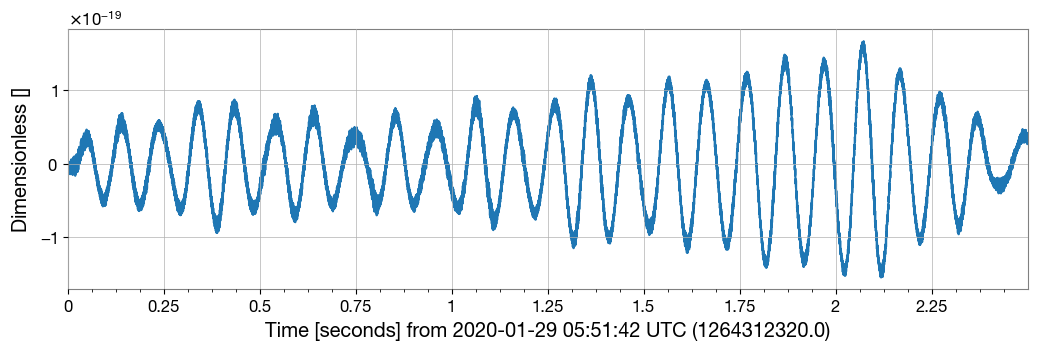

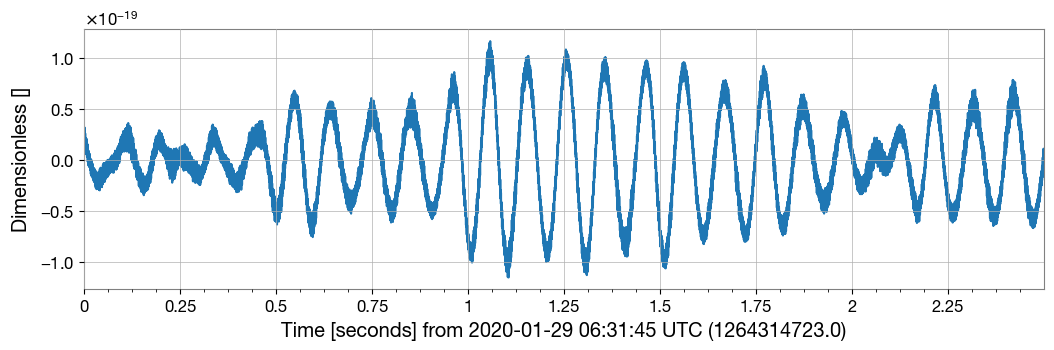

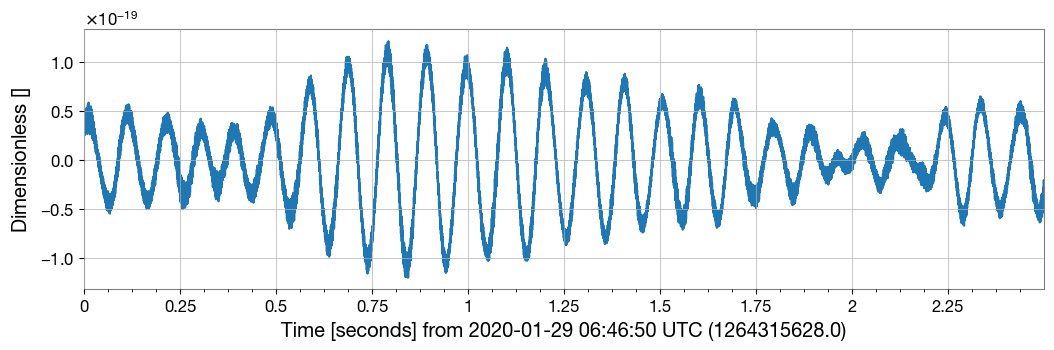

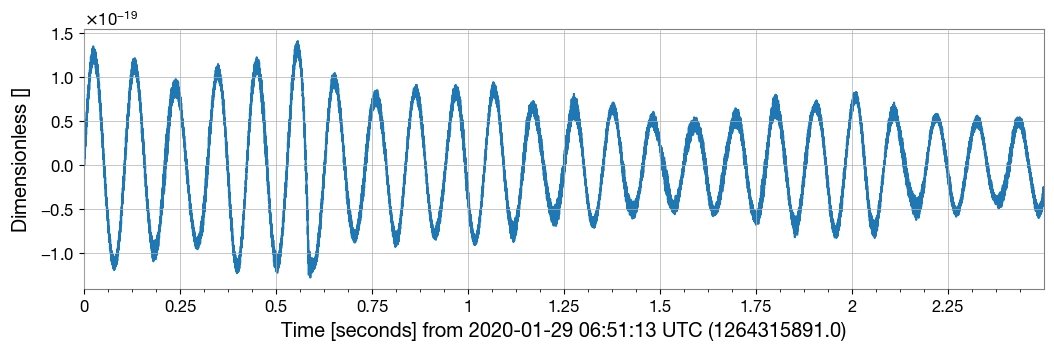

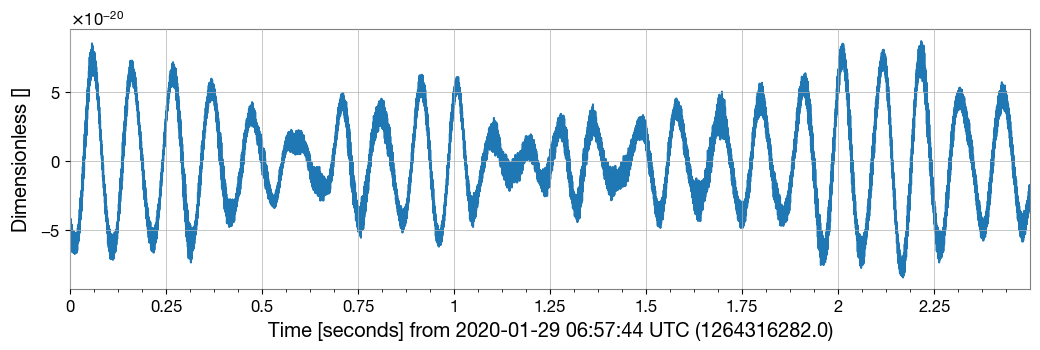

In [13]:
for (begin, end) in mask.active:
    sub = data.crop(begin, begin + 2.5)
    sub.plot()

## How to go further?

`GWpy` has many more functions and a very complete doc.
Have a look at it [here](https://gwpy.github.io/docs/stable/).

# What's next ?

Congratulations, you have completed the first steps of working with GW data !

To continue your journey, we recommend you take a look at the [GWOSC Learning Path](https://gwosc.org/path/).
You may also be interested in our [GW Data Quickview App](https://gw-quickview.streamlit.app/).
And finally, you can participate in our annual [GW Open Data Workshops](https://gwosc.org/workshops/).